# Практика

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [114]:
# экспоненциальное распределение
expon_rv = sts.expon()
sample = expon_rv.rvs(100)
#sample

In [115]:
sample.dtype

dtype('float64')

In [116]:
real_mean = expon_rv.mean() # настоящее среднее случайной величины
real_mean

1.0

In [117]:
real_var = expon_rv.var() # настоящая дисперсия случайной величины
real_var

1.0

### Постройте гистограмму выборки и теоретическую плотность распределения

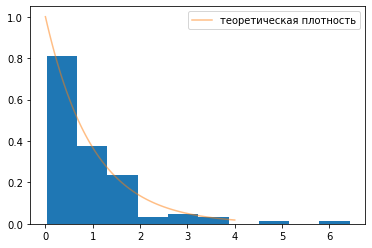

In [118]:
plt.hist(sample, density=True)
x = np.linspace(0,4,100)
pdf = expon_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

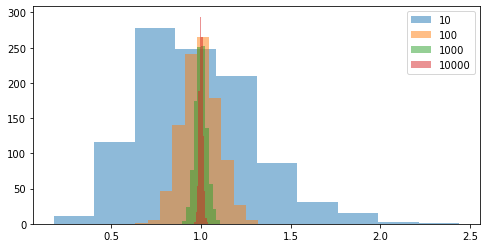

In [119]:
plt.figure(figsize=(8,4))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
        means.append(np.mean(expon_rv.rvs(N)))
    plt.hist(means, alpha=0.5)
plt.legend(['10', '100', '1000', '10000'])


In [120]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

0.94391695618268
1.0263494154502752


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

In [121]:
# Объем выборки N=10
means = []
for i in range(1000):
    means.append(np.mean(expon_rv.rvs(10)))

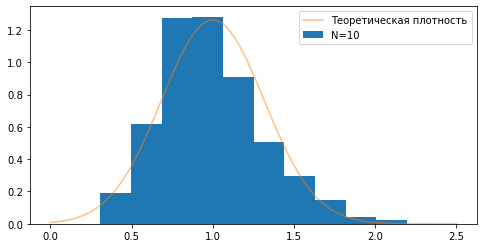

In [130]:
norm_rv = sts.norm(loc=expon_rv.mean(), scale=expon_rv.std() / np.sqrt(10))
plt.figure(figsize=(8,4))
plt.hist(means, density=True, bins=10, label='N=10')
x = np.linspace(0, 2.5, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend()
plt.show()

In [131]:
# Объем выборки N=50
means = []
for i in range(1000):
    means.append(np.mean(expon_rv.rvs(50)))

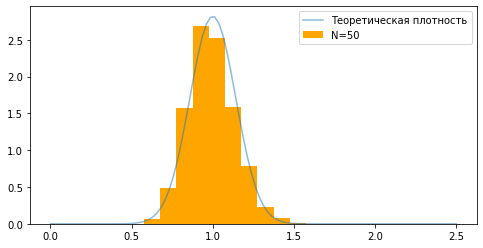

In [132]:
norm_rv = sts.norm(loc=expon_rv.mean(), scale=expon_rv.std() / np.sqrt(50))
plt.figure(figsize=(8,4))
plt.hist(means, density=True, bins=10, color='orange', label = 'N=50')
x = np.linspace(0, 2.5, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend()
plt.show()

In [133]:
# Объем выборки N=100
means = []
for i in range(1000):
    means.append(np.mean(expon_rv.rvs(100)))

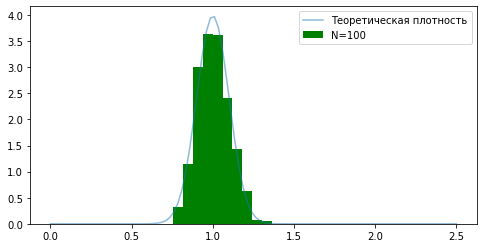

In [134]:
norm_rv = sts.norm(loc=expon_rv.mean(), scale=expon_rv.std() / np.sqrt(100))
plt.figure(figsize=(8,4))
plt.hist(means, density=True, bins=10, color='green', label = 'N=100')
x = np.linspace(0, 2.5, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend()
plt.show()

In [135]:
# Объем выборки N=1000
means = []
for i in range(1000):
    means.append(np.mean(expon_rv.rvs(1000)))

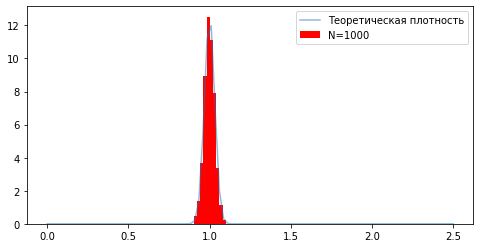

In [136]:
norm_rv = sts.norm(loc=expon_rv.mean(), scale=expon_rv.std() / np.sqrt(1000))
plt.figure(figsize=(8,4))
plt.hist(means, density=True, bins=10, color='red', label = 'N=1000')
x = np.linspace(0, 2.5, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend()
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

In [ ]:
Аппроксимация выборочного среднего работает хорошо, т.к. с ростом объема выборки распределение приближается к нормальному,
выборочное среднее приближается к теоретическому среднему=1, т.е.точность аппроксимации увеличивается.

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [107]:
import pathlib
from pathlib import Path
work_path = pathlib.Path.cwd()
print(work_path)
data_path = Path(work_path,'telecom_churn.csv')
telecom = pd.read_csv(data_path,
                          sep = ',',
                          nrows=1000000)
telecom.head(5)

C:\Users\User\DataspellProjects\dsProject\DA-Lesson_12


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [15]:
# Сводка статистик для столбца ' total day calls' - 1 вариант
b=telecom.groupby(['churn'])['total day calls'].agg(['mean','var','std','count'])
b

,mean,var,std,count
churn,,,,
False,100.283158,392.085817,19.801157,2850
True,101.335404,465.795985,21.582307,483


In [95]:
# Сводка статистик для столбца ' total day calls' - 2 вариант
b=telecom.groupby(['churn'])['total day calls'].describe()
b

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
False,2850.0,100.283158,19.801157,0.0,87.0,100.0,114.0,163.0
True,483.0,101.335404,21.582307,0.0,87.5,103.0,116.5,165.0


In [23]:
# Доверительные интервалы в разрезе столбца 'churn'
print("Доверительный интервал для среднего по цпт (churn=False), если нам известна дисперсия: [{}, {}] ".format(
    b['mean'][0] - 2 * b['std'][0] / np.sqrt(2850), b['mean'][0] + 2 * b['std'][0] / np.sqrt(2850) 
))
print("Доверительный интервал для среднего по цпт (churn=True), если нам известна дисперсия: [{}, {}] ".format(
    b['mean'][1] - 2 * b['std'][1] / np.sqrt(483), b['mean'][1] + 2 * b['std'][1] / np.sqrt(483) 
))

Доверительный интервал для среднего по цпт (churn=False), если нам известна дисперсия: [99.54133858857831, 101.02497720089538] 
Доверительный интервал для среднего по цпт (churn=True), если нам известна дисперсия: [99.37134576363385, 103.2994616897823] 


In [104]:
#Доверительные интервалы с помощью функций from statsmodels.stats.weightstats import _zconfint_generic
print('Доверительный интервал для churn=False:',np.round(_zconfint_generic(b['mean'][0], b['std'][0] / np.sqrt(2850), 0.05, "two-sided"),4))


Доверительный интервал для churn=False: [ 99.5562 101.0101]


In [105]:
print('Доверительный интервал для churn=True:',np.round(_zconfint_generic(b['mean'][1], b['std'][1] / np.sqrt(483), 0.05, "two-sided"),4))

Доверительный интервал для churn=True: [ 99.4107 103.2601]


In [ ]:
Вывод: имеются незначительные расхождения при сравнении результатов.